plt.scatter(x=range(len(bok)),y=bok)# LO1, Performance

In [1]:
#!pip install altair
#!pip install folium
#!pip install plotly.express
#!pip install ipywidgets
#!pip install altair_viewer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import timeit
from IPython.display import clear_output
import altair_viewer
output_notebook()
alt.data_transformers.disable_max_rows()
alt.renderers.enable('mimetype');

Loading BokehJS ...

In [2]:
def test_data(size, mean = 0.5, var = 0.1, *coef):
    """
    Return random data 
    """
    x = np.random.normal(loc=mean, scale=np.sqrt(var), size=size).reshape(-1,1)
    var = np.random.normal(loc=0, scale=np.sqrt(var), size=size).reshape(-1,1)
    y = coef[0] + coef[1:] * x + var
    
    return np.hstack((x,y))



def time_plot(tool, n_iter, max_dpoints, n_to_average):
    """
    Times (average) runtime with increasing number of datapoints
    
    Arguments
    ---------
    tool:         str, either 'matplotlib', 'plotly', 'altair', 'bokeh'
    n_iter:       int, number of iterations (with increasing number of datapoints)
    max_dpoints:  int, max number of datapoints to draw
    n_to_avergae: int, number of iterations to plot with same datapoints to average out runtime
    
    Returns
    -------
    times:        list of averaged out runtimes with increasing datapoints
    """
    assert tool in ['matplotlib', 'plotly', 'altair', 'bokeh'], 'tool not allowed, see docstring'
    
    times = []
    step = 0
    while step <= n_iter:
        data = test_data(max_dpoints//n_iter * step+1, 0.5, 0.1, 6.0, 1.5)
        if tool == 'altair' or tool == 'bokeh':
            data = pd.DataFrame(data, columns=['x','y'])
        
        current_times = []
        for _ in range(n_to_average):
            if tool == 'plotly':
                start = timeit.default_timer()
                
                fig = px.scatter(x=data[:,0], y=data[:,1])
                fig.show()
                clear_output(wait=False)
                
                end = timeit.default_timer()
                current_times.append(end-start)
            
            elif tool == 'matplotlib':
                start = timeit.default_timer()
                
                fig = plt.scatter(x=data[:,0], y=data[:,1])
                plt.show()
                clear_output(wait=False)
                
                end = timeit.default_timer()
                current_times.append(end-start)
                
            elif tool == 'altair':
                
                start = timeit.default_timer()
                print(alt)
                chart = alt.Chart(data).mark_circle(size=60).encode(
                    x='x',
                    y='x',
                     ).interactive()
                altair_viewer.show(chart, open_browser=False)
                clear_output(wait=False)
                
                end = timeit.default_timer()
                current_times.append(end-start)
                
            elif tool == 'bokeh':
                start = timeit.default_timer()
                
                TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in"
                p = figure(tools=TOOLS)

                p.scatter(data.x, data.y)

                output_file("color_scatter.html", title="color_scatter.py example", mode='inline')

                handle = show(p, notebook_handle=True) 
                #push_notebook(handle=handle)
                
                clear_output(wait=False)
                
                end = timeit.default_timer()
                current_times.append(end-start)
        print(len(current_times))    
        times.append(sum(current_times)/n_to_average)
        step += 1
    
    return times

In [8]:
50000//20

2500

In [3]:
alt = time_plot('altair', 20, 50000, 25)
bok = time_plot('bokeh', 20, 50000, 25)
mat = time_plot('matplotlib', 20, 50000, 25)
plo = time_plot('plotly', 20, 50000, 25)

25


In [4]:
import pickle

a = [alt, bok, mat, plo]

with open('tests.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
alt[0] = np.nan

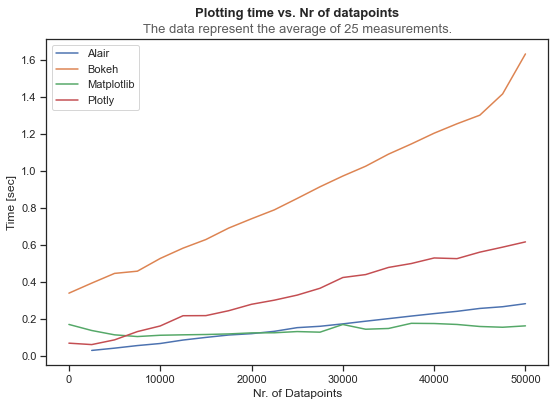

In [34]:
import seaborn as sns

sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("ticks")

sns.lineplot(x=np.arange(len(alt))*(50000//20),y=alt)
sns.lineplot(x=np.arange(len(bok))*(50000//20),y=bok)
sns.lineplot(x=np.arange(len(mat))*(50000//20),y=mat)
ax = sns.lineplot(x=np.arange(len(plo))*(50000//20),y=plo)
ax.text(x=0.5, 
        y=1.06, 
        s=f'Plotting time vs. Nr of datapoints', 
        fontsize=13, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, 
        y=1.01,
        s=f'The data represent the average of 25 measurements.',
        fontsize=13, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.xlabel('Nr. of Datapoints')
plt.ylabel('Time [sec]')

ax.legend(labels=['Alair', 'Bokeh', 'Matplotlib', 'Plotly'])
plt.show()